In [1]:
#Importar paquetes necesarios para hacer la regresión con redes neuronales.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.autograd import Variable #Función que convierte en tensores los np.arrays
import torch.utils.data as Data

#Se leen los datos
datos = pd.read_csv('MLP_regresion.csv')
datos.keys()

Index(['X', 'Y'], dtype='object')

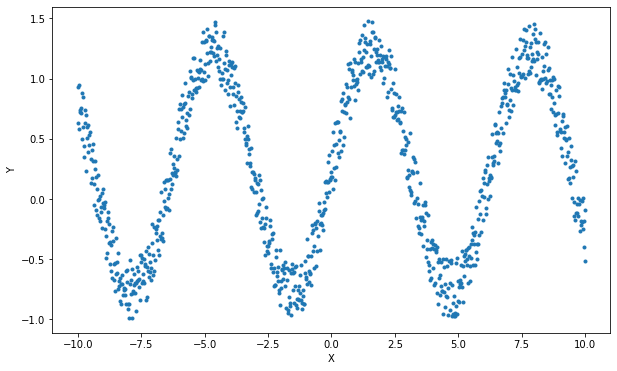

In [2]:
#Asignamos las columnas
X = np.array(datos['X'])
Y = np.array(datos['Y'])

#Visual de los datos

fig = plt.figure(figsize=(10,6))
plt.plot(X,Y,'.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
#Convertimos los arrays de datos en tensores

X_T = Variable(torch.from_numpy(X)).float()
X_T = torch.unsqueeze(X_T,dim=1)


Y_T = Variable(torch.from_numpy(Y)).float()
Y_T = torch.unsqueeze(Y_T,dim=1)

In [4]:
#Definimos el primer modelo de la red neuronal
input_dim = 1
model1 = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 30),
                torch.nn.ReLU(),
                torch.nn.Linear(30, 20),
                torch.nn.ReLU(),
                torch.nn.Linear(20, 10),
                torch.nn.ReLU(),
                torch.nn.Linear(10, input_dim)
                )
model1

Sequential(
  (0): Linear(in_features=1, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=1, bias=True)
)

In [5]:
#Se define el optimizador y el criterio de evaluación de la red
optimizer = torch.optim.SGD(model1.parameters(), lr=0.2)
criterion = torch.nn.MSELoss()

Epoch: [1/1], loss: 0.9759449362754822


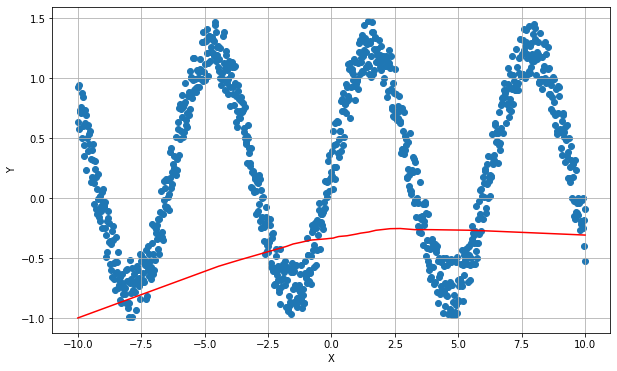

Epoch: [1/5001], loss: 0.06761416792869568


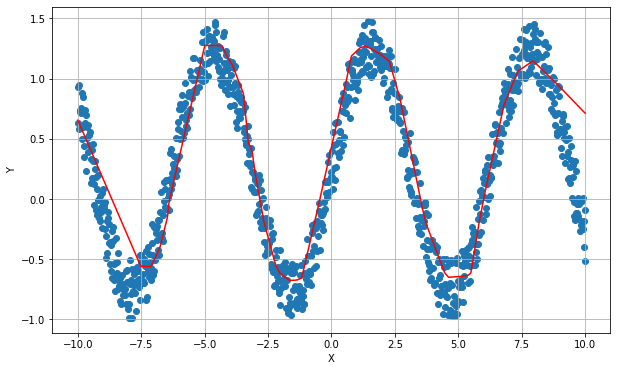

Epoch: [1/10001], loss: 0.043628990650177


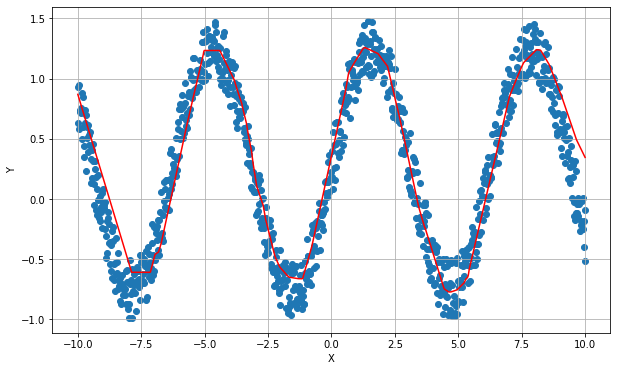

Epoch: [1/15001], loss: 0.03450385108590126


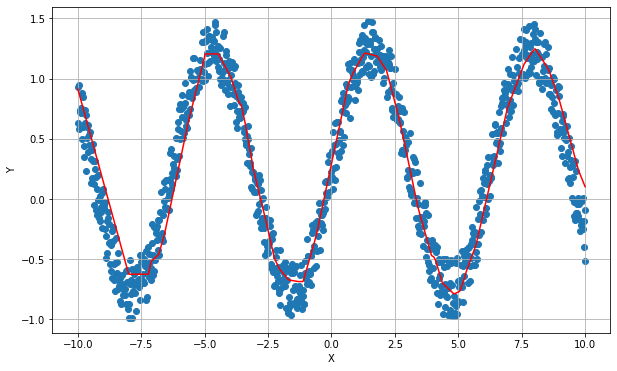

Epoch: [1/20001], loss: 0.035670433193445206


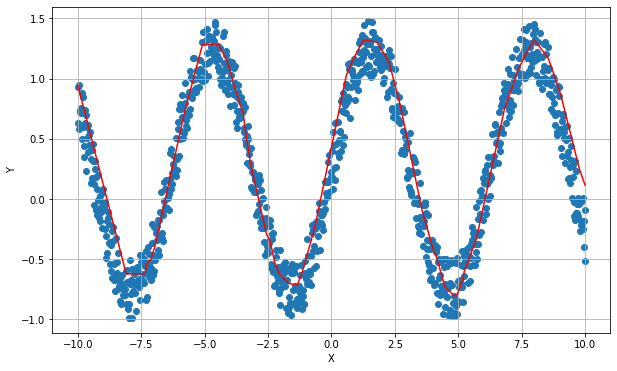

In [6]:
#Se define el número de épocas y corremos el entrenamieto de la red
n_epoch = 20001
loss_list = []

for epoch in range(n_epoch+1):
  
    Y_pred = model1(X_T)

    loss = criterion(Y_pred, Y_T)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch%5000 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(10,6))
      plt.scatter(X_T.data.numpy(), Y_T.data.numpy())
      plt.plot(X_T.data.numpy(), Y_pred.data.numpy(), 'r-')
      plt.grid()
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.show()

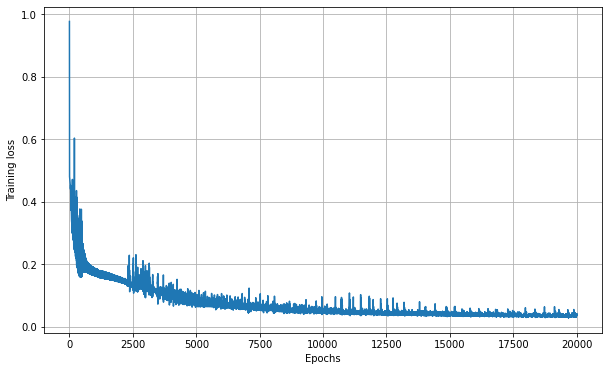

In [7]:
#Gráfica de la perdida
fig = plt.figure(figsize=(10, 6))
plt.plot(loss_list)
plt.ylabel("Training loss")
plt.xlabel("Epochs")
plt.grid()
plt.show()

In [8]:
#Definimos el primer modelo de la red neuronal
input_dim = 1
model2 = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 10),
                torch.nn.ReLU(),
                torch.nn.Linear(10, 10),
                torch.nn.ReLU(),
                torch.nn.Linear(10, 10),
                torch.nn.ReLU(),
                torch.nn.Linear(10, 10),
                torch.nn.ReLU(),
                torch.nn.Linear(10, 10),
                torch.nn.ReLU(),
                torch.nn.Linear(10, input_dim)
                )
model2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): ReLU()
  (8): Linear(in_features=10, out_features=10, bias=True)
  (9): ReLU()
  (10): Linear(in_features=10, out_features=1, bias=True)
)

In [9]:
#Se define el optimizador y el criterio de evaluación de la red
optimizer = torch.optim.SGD(model2.parameters(), lr=0.2)
criterion = torch.nn.MSELoss()

Epoch: [1/1], loss: 0.6869523525238037


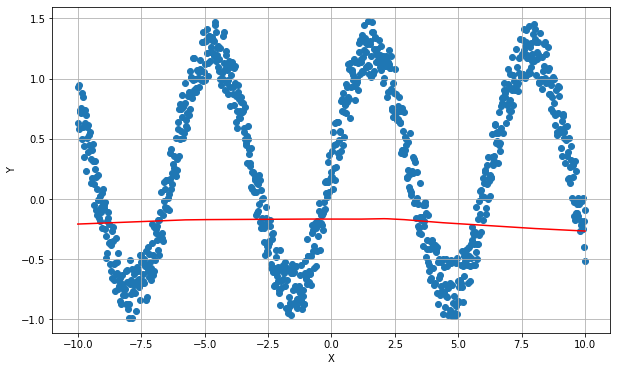

Epoch: [1/5001], loss: 0.056607503443956375


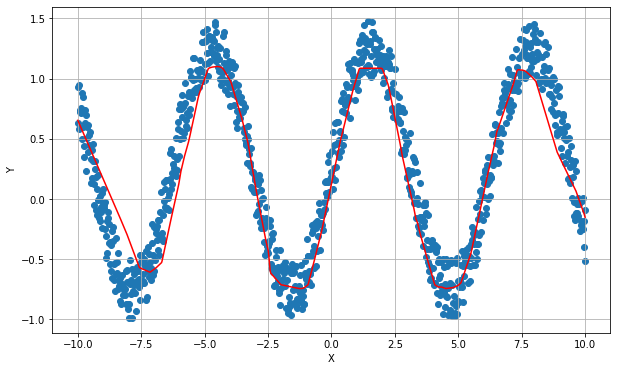

Epoch: [1/10001], loss: 0.03534333035349846


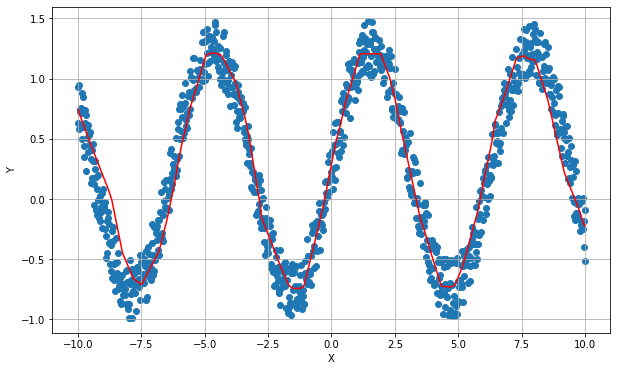

Epoch: [1/15001], loss: 0.027472583577036858


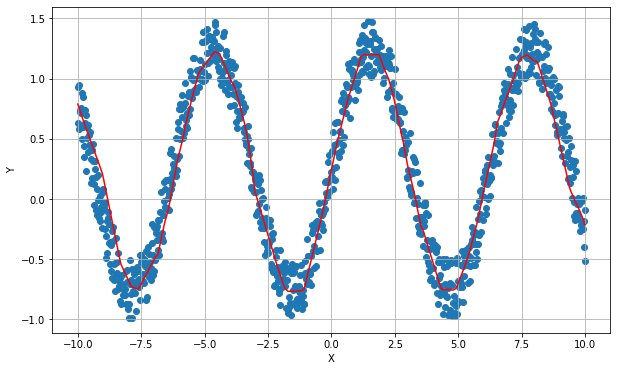

Epoch: [1/20001], loss: 0.02448260970413685


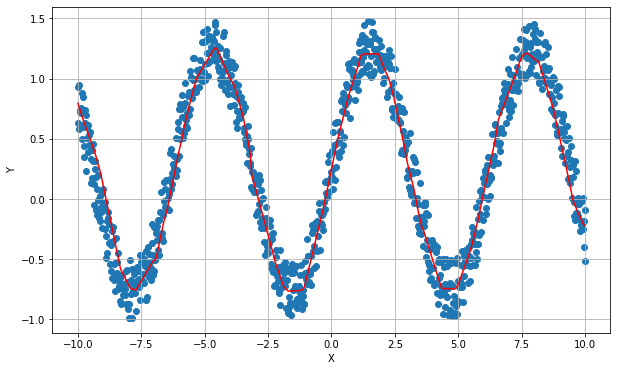

In [10]:
#Se define el número de épocas y corremos el entrenamieto de la red
n_epoch = 20001
loss_list = []

for epoch in range(n_epoch+1):
  
    Y_pred = model2(X_T)

    loss = criterion(Y_pred, Y_T)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch%5000 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(10,6))
      plt.scatter(X_T.data.numpy(), Y_T.data.numpy())
      plt.plot(X_T.data.numpy(), Y_pred.data.numpy(), 'r-')
      plt.grid()
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.show()

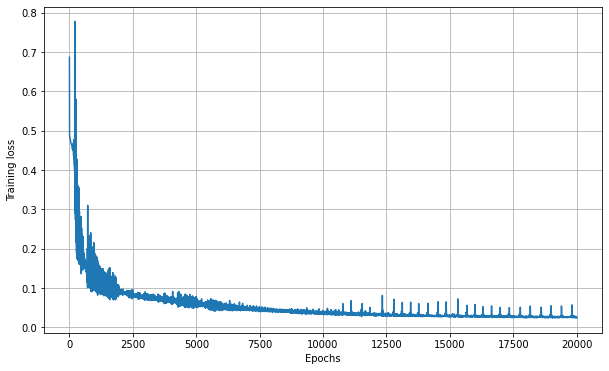

In [11]:
#Gráfica de la perdida
fig = plt.figure(figsize=(10, 6))
plt.plot(loss_list)
plt.ylabel("Training loss")
plt.xlabel("Epochs")
plt.grid()
plt.show()

## Análisis:

Ambos modelos de ANN tuvieron una convergencia en sus valores de pérdida menores a 0.1. En el caso de ambas se logran ver oscilaciones en dicho valor pero cada vez se dan con picos más pequeños.

En el caso de la primera red neuronal se tienen 3 capas con un número de neuronas descendente, siendo estos números 30 20 y 10 respectivamente, con una taza de aprendizaje de 0.2 y 20001 épocas. Esto logra una convergencia y un modelo funcional para hacer la regresión de los datos; sin embargo, la gráfica de la pérdida oscila demasiado y no converge tan rápidamente, si se hubieran usado menos épocas la regresión no sería tan buena, por lo que es una red neuronal que requiere de un número alto de épocas para converger.

En el caso de la segunda red neuronal, esta converge mucho más rápido, puesto que la pérdida después de 2500 épocas ya se encuentra por debajo de 0.1. Esta fue diseñada con 5 capas de redes neuronales, con 10 neuronas cada una, en donde se dejaron constantes los valores de la taza de aprendizaje y el número de épocas con respecto al modelo anterior. 

Adicionalmete, podemos observar que en general el segundo modelo tiene oscilaciones más leves que el primero en la gráfica de pérdida, y llega a un valor de pérdida menor. Por lo cual podemos afirmar que, si bien en las gráficas de las regresiones son muy similares al final y visualmente no se distingue con facilidad una diferencia contundente, se puede decir que el segundo modelo fue mejor que el primero, por su más rapida convergencia y su menor cantidad de oscilaciones en la gráfica de la pérdida, esto hace que si se usa el segundo modelo se necesite una menor cantidad de épocas para obtener una buena regresión lo cual podría traducirse en un menor tiempo de ejecucuión para obtener un resultado similar. 

En conclusión, para este problema de regresión con una función sinosuidal ruidosa, se obtienen mejores resultados con una red neuronal artificial planteada con varias capas así tenga una poca cantidad de neuronas cada una de estas, en vez de una planteada con mayor cantidad de neuronas en menos capas y orden descendente.

